<a href="https://colab.research.google.com/github/gauravgargba/courses/blob/master/_CasualInference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

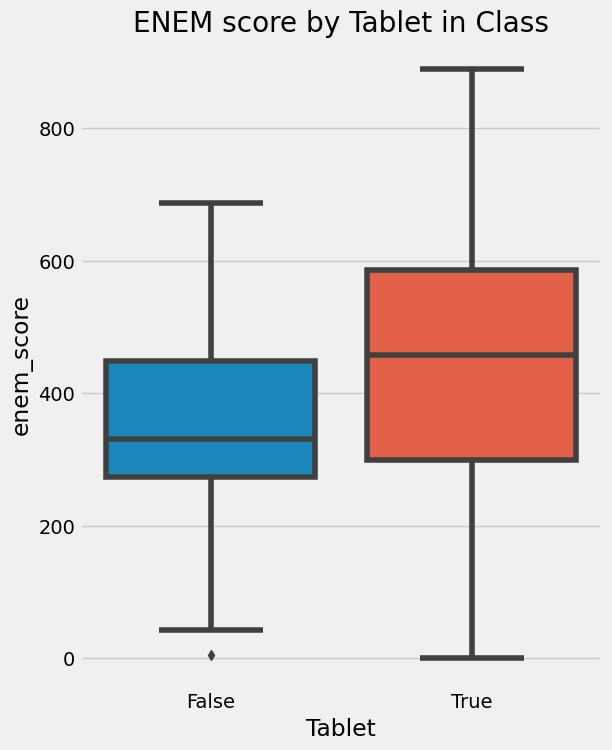

In [ ]:
#Chapter 1

import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n= 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000
data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))
#print("Mean =",tuition.mean())
#print("SD =",tuition.std())
#expit(1)
#standard_tution = (tuition - tuition.mean()) / tuition.std()
#standard_tution.max() - standard_tution.min()
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

In [ ]:
#Chapter 2

import pandas as pd
import numpy as np
data = pd.read_csv("./drive/My Drive/0Colab/online_classroom.csv")
print(data.shape)
data.head(10)
(data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


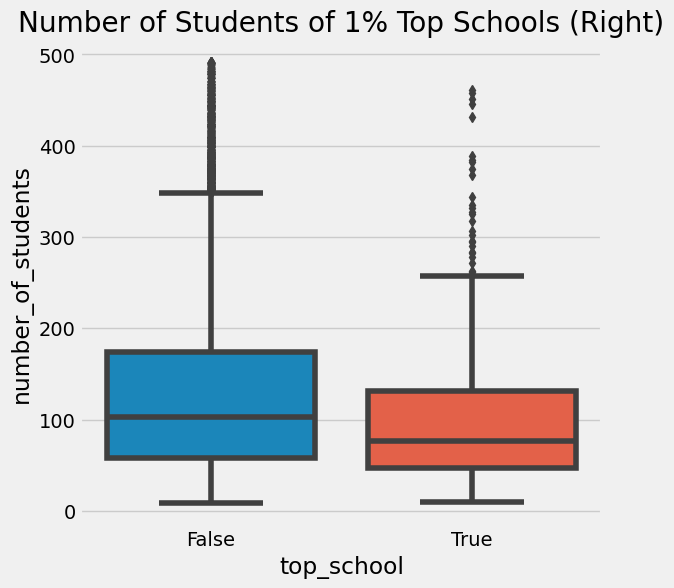

In [ ]:
#Chapter 3

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

df = pd.read_csv("./drive/My Drive/0Colab/enem_scores.csv")
df.sort_values(by = "avg_score", ascending = False).head()

plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             [["top_school", "number_of_students"]]
             .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(6,6))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

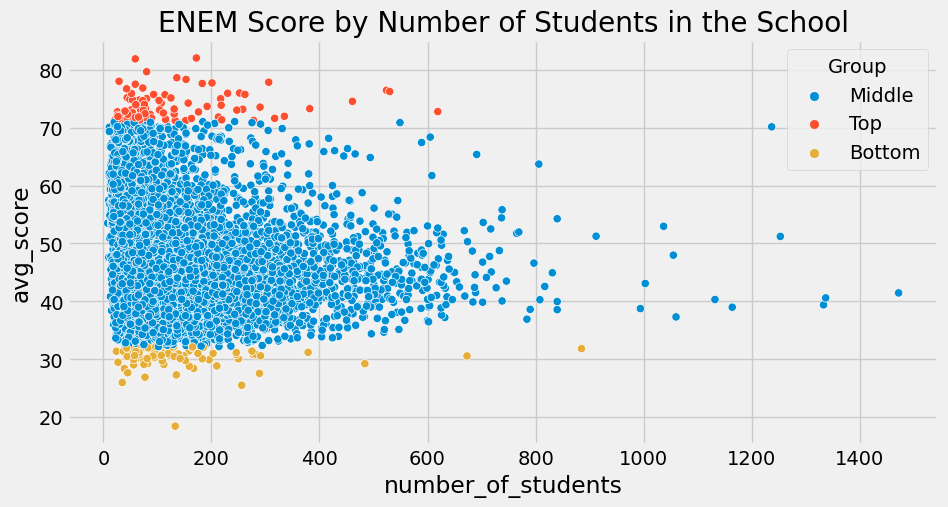

In [ ]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
                                                 ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students in the School");

In [ ]:
data = pd.read_csv("./drive/My Drive/0Colab/online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]
def se(y: pd.Series):
    return y.std() / np.sqrt(len(y)-1)

print("SE for Online:", se(online))
print("SE for Face to Face:", se(face_to_face))

SE for Online: 1.5454015979281193
SE for Face to Face: 0.8760088184690857


In [ ]:
from scipy import stats
z = stats.norm.ppf(.999999999) #sixsigma
print(z)
#95% refers to the frequency that such confidence intervals, computed in many studies, contain the true mean

5.997807019601637


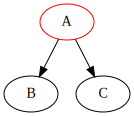

In [ ]:
#Chapter 4

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

f = gr.Digraph()
f.edge("A","B")
f.edge("A","C")
f.node("A", "A", color="red")

f

In [ ]:
#Chapter 5
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
%matplotlib inline

data = pd.read_csv("./drive/My Drive/0Colab/online_classroom.csv")
data.head()
results = smf.ols("falsexam ~ format_ol", data = data).fit()
results.summary()



,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [ ]:
data.groupby("format_ol")["falsexam"].mean()

format_ol
0    77.855523
1    73.635263
Name: falsexam, dtype: float64

In [ ]:
#Proving Regression theory

X = data[["format_ol"]].assign(intercep = 1)
y = data[["falsexam"]]

def regress(y,X):
  return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta = regress(y,X)
beta


array([[-4.22026036],
       [77.85552345]])

In [ ]:
kapa = data["falsexam"].cov(data["format_ol"]) / data["format_ol"].var()
kapa

-4.220260364675276

In [ ]:
#Observational Data

wage = pd.read_csv("./drive/MyDrive/0Colab/wage.csv").dropna()
wage.head()
model_1 = smf.ols("np.log(hwage) ~ educ", data = wage.assign(hwage = wage["wage"]/wage["hours"])).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3071,0.104,22.089,0.000,2.102,2.512
educ,0.0536,0.008,7.114,0.000,0.039,0.068


In [ ]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black',
            'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']
#wage = wage.assign(hwage = wage["wage"]/wage["hours"])
X = wage[controls].assign(intercep = 1)
t = wage["educ"]
y = wage["lhwage"]
beta_aux = regress(t,X)
t_tilde = t - X.dot(beta_aux)

kappa = t_tilde.cov(y) / t_tilde.var()
kappa

0.04114719101006184

In [ ]:
model_2 = smf.ols('lhwage ~ educ +' + '+'.join(controls), data=wage).fit()
#model_2 = smf.ols('np.log(hwage) ~ educ +' + '+'.join(controls), data=wage).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1156,0.232,4.802,0.000,0.659,1.572
educ,0.0411,0.010,4.075,0.000,0.021,0.061
IQ,0.0038,0.001,2.794,0.005,0.001,0.006
exper,0.0153,0.005,3.032,0.003,0.005,0.025
tenure,0.0094,0.003,2.836,0.005,0.003,0.016
age,0.0086,0.006,1.364,0.173,-0.004,0.021
married,0.1795,0.053,3.415,0.001,0.076,0.283
black,-0.0801,0.063,-1.263,0.207,-0.205,0.044
south,-0.0397,0.035,-1.129,0.259,-0.109,0.029
urban,0.1926,0.036,5.418,0.000,0.123,0.262


In [ ]:
#Chapter 6

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


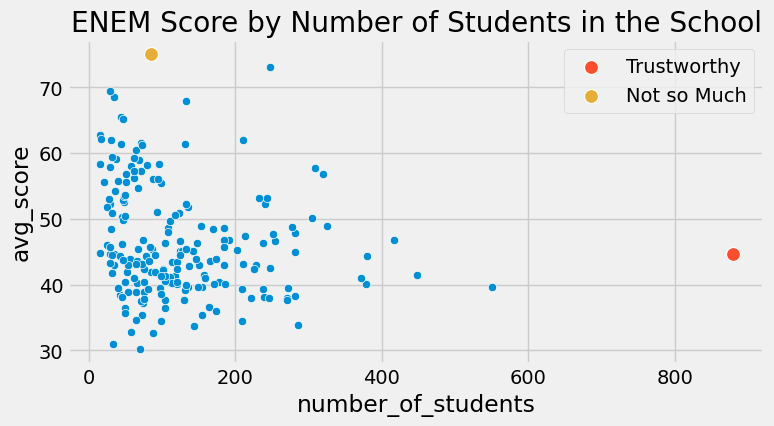

In [ ]:
np.random.seed(876)
enem = pd.read_csv('./drive/MyDrive/0Colab/enem_scores.csv').sample(200)
plt.figure(figsize = (8,4))
sns.scatterplot(y="avg_score", x="number_of_students", data=enem)
sns.scatterplot(y="avg_score", x="number_of_students", s=100, label="Trustworthy",
                data=enem.query(f"number_of_students=={enem.number_of_students.max()}"))
sns.scatterplot(y="avg_score", x="number_of_students", s=100, label="Not so Much",
                data=enem.query(f"avg_score=={enem.avg_score.max()}"))
plt.title("ENEM Score by Number of Students in the School");


In [ ]:
wage = pd.read_csv('./drive/MyDrive/0Colab/wage.csv')[["wage", "lhwage", "educ", "IQ"]]
wage.head()
model_1 = smf.ols('lhwage ~ educ', data=wage).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2954,0.089,25.754,0.000,2.121,2.470
educ,0.0529,0.007,8.107,0.000,0.040,0.066


In [ ]:
group_wage = (wage.assign(count = 1).groupby("educ").agg({"lhwage":"mean", "count":"sum"})).reset_index()
group_wage
model_2 = smf.wls('lhwage ~ educ', data=group_wage, weights=group_wage["count"]).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2954,0.078,29.327,0.000,2.115,2.476
educ,0.0529,0.006,9.231,0.000,0.040,0.066


In [ ]:
model_3 = smf.ols('lhwage ~ educ', data=group_wage).fit()
model_3.summary().tables[1]


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3650,0.082,28.988,0.000,2.177,2.553
educ,0.0481,0.006,8.136,0.000,0.034,0.062


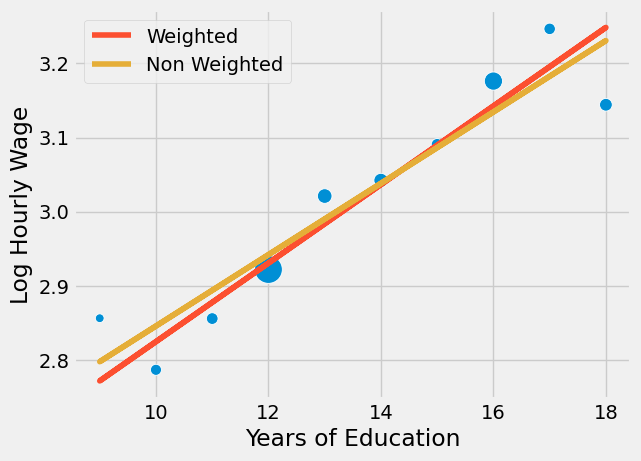

In [ ]:
sns.scatterplot(x="educ", y = "lhwage", size="count", legend=False, data=group_wage, sizes=(40, 400))
plt.plot(wage["educ"], model_2.predict(wage["educ"]), c="C1", label = "Weighted")
plt.plot(wage["educ"], model_3.predict(wage["educ"]), c="C2", label = "Non Weighted")
plt.xlabel("Years of Education")
plt.ylabel("Log Hourly Wage")
plt.legend();

In [ ]:
group_wage = (wage
              .assign(count=1)
              .groupby("educ")
              .agg({"lhwage":"mean", "IQ":"mean", "count":"count"})
              .reset_index())

model_4 = smf.wls('lhwage ~ educ + IQ', data=group_wage, weights=group_wage["count"]).fit()
print("Number of observations:", model_4.nobs)
model_4.summary().tables[1]

Number of observations: 10.0


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8821,0.324,5.800,0.001,1.115,2.649
educ,0.0257,0.021,1.198,0.270,-0.025,0.077
IQ,0.0077,0.006,1.309,0.232,-0.006,0.022


In [ ]:
#DUMMY

wage = (pd.read_csv("./drive/MyDrive/0Colab/wage.csv")
        .assign(hwage = lambda d: d["wage"]/d["hours"])
        .assign(T = lambda d: (d["educ"]>12).astype(int)))

#wage = pd.read_csv("./drive/MyDrive/0Colab/wage.csv")
#wage["hwage"] = wage["wage"]/wage["hours"]
#wage["T"] = (wage["educ"]>12).astype(int)

#For operations that can be performed with vectorized methods (like basic arithmetic operations, comparisons, and most of Pandas' built-in functions), it's almost always better to use vectorization.
#Lambda functions are more suitable for more complex operations that can't be easily vectorized or when you need custom logic that isn't covered by Pandas' built-in functions.

smf.ols("hwage ~ T", data = wage).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,19.9405,0.436,45.685,0.000,19.084,20.797
T,4.9044,0.626,7.830,0.000,3.675,6.134


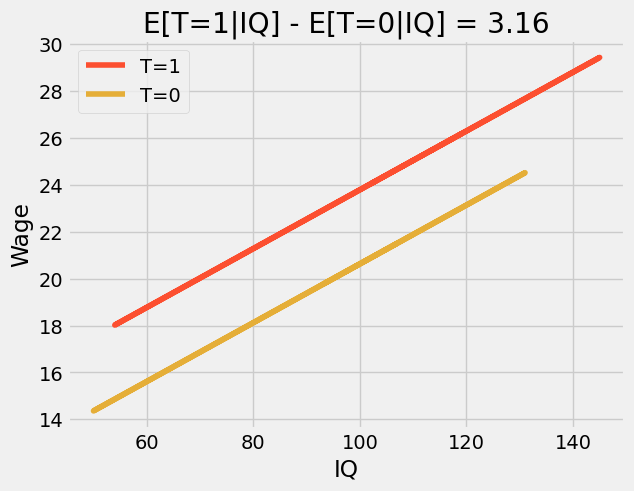

In [ ]:
#dummy with other X fixed

m = smf.ols('hwage ~ T+IQ', data=wage).fit()
plt_df = wage.assign(y_hat = m.fittedvalues)

plt.plot(plt_df.query("T==1")["IQ"], plt_df.query("T==1")["y_hat"], c="C1", label="T=1")
plt.plot(plt_df.query("T==0")["IQ"], plt_df.query("T==0")["y_hat"], c="C2", label="T=0")
plt.title(f"E[T=1|IQ] - E[T=0|IQ] = {round(m.params['T'], 2)}")
plt.ylabel("Wage")
plt.xlabel("IQ")
plt.legend();

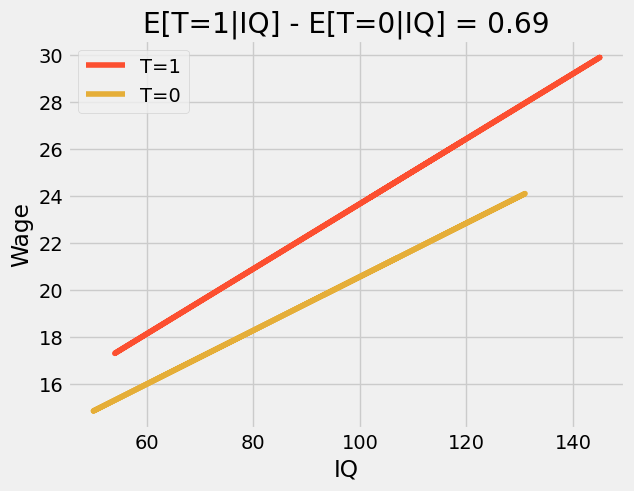

In [ ]:
m = smf.ols("hwage ~ T*IQ", data = wage).fit()
plt_df = wage.assign(y_hat = m.fittedvalues)

plt.plot(plt_df.query("T==1")["IQ"], plt_df.query("T==1")["y_hat"], c="C1", label="T=1")
plt.plot(plt_df.query("T==0")["IQ"], plt_df.query("T==0")["y_hat"], c="C2", label="T=0")
plt.title(f"E[T=1|IQ] - E[T=0|IQ] = {round(m.params['T'], 2)}")
plt.ylabel("Wage")
plt.xlabel("IQ")
plt.legend();

In [ ]:
#wage_ed_bins = (wage
#                .assign(IQ_bins = lambda d: pd.qcut(d["IQ"], q=4, labels=range(4)))
#                [["hwage", "educ", "IQ_bins"]])

wage_ed_bins = (wage.assign(IQ_bins = pd.qcut(wage["IQ"], q=4, labels=range(4))))[["hwage", "educ", "IQ_bins"]]

wage_ed_bins.head()

,hwage,educ,IQ_bins
0,19.225,12,1
1,16.160,18,3
2,20.625,14,2
3,16.250,12,1
4,14.050,11,0


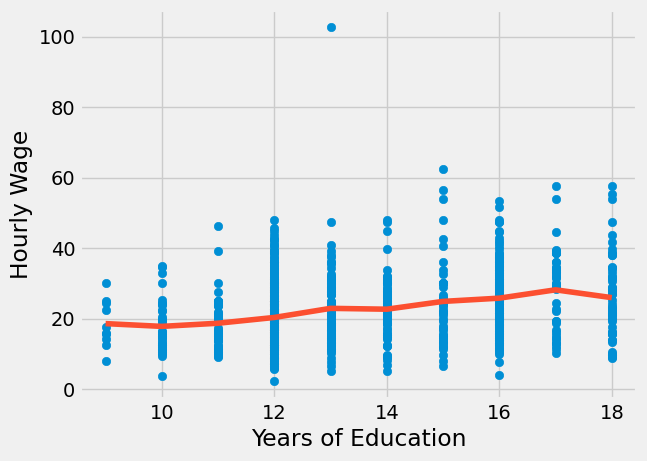

In [ ]:
model_dummy = smf.ols('hwage ~ C(educ)', data=wage).fit()
model_dummy.summary().tables[1]

plt.scatter(wage["educ"], wage["hwage"])
plt.plot(wage["educ"].sort_values(), model_dummy.predict(wage["educ"].sort_values()), c="C1")
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage");

In [ ]:
wage[wage["educ"] == 17]["hwage"].mean()


28.150472362353515

Difference in means: -0.6202804021329484


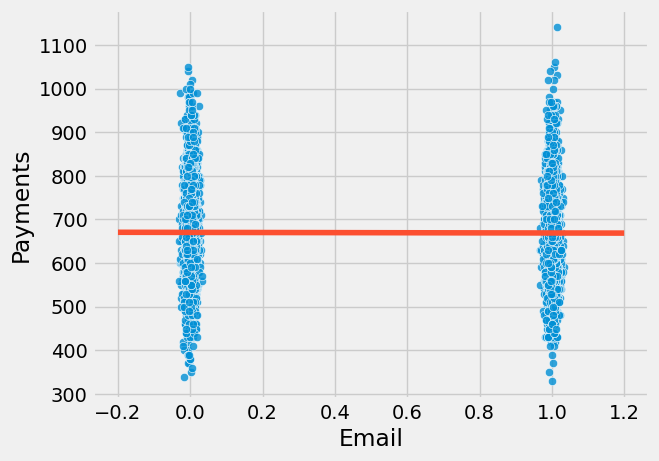

In [ ]:
#Chapter 7

#Good Control

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr

style.use("fivethirtyeight")

data = pd.read_csv("./drive/MyDrive/0Colab/collections_email.csv")
data.head()

print("Difference in means:", data[data["email"] == 1]["payments"].mean() - data[data["email"] == 0]["payments"].mean())

#print("Difference in means:",
#      data.query("email==1")["payments"].mean() - data.query("email==0")["payments"].mean())

model = smf.ols("payments ~ email", data = data).fit()
model.summary().tables[1]

sns.scatterplot(x = 'email', y = 'payments', alpha = 0.8, data = data.assign(email = data['email'] + np.random.normal(0,0.01, size = len(data['email']))))
plt.plot(np.linspace(-0.2, 1.2), model.params[0] + np.linspace(-1, 2) * model.params[1], c="C1")
plt.xlabel("Email")
plt.ylabel("Payments");


Payments Variance: 10807.612416
Payments Variance - Residual 5652.453558466208
Email Variance: 0.24991536
Email Variance - Residual 0.24918421069820032
                            OLS Regression Results                            
Dep. Variable:           res_payments   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.328
Date:                Mon, 25 Dec 2023   Prob (F-statistic):             0.0375
Time:                        18:08:54   Log-Likelihood:                -28692.
No. Observations:                5000   AIC:                         5.739e+04
Df Residuals:                    4998   BIC:                         5.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

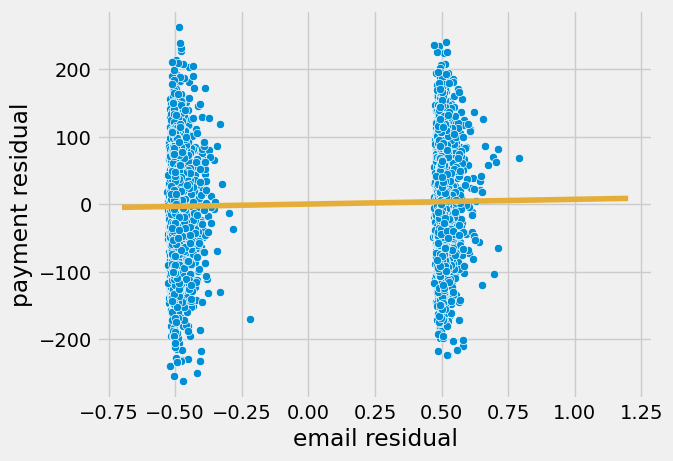

In [ ]:
data.head()

model_email = smf.ols("email ~ credit_limit + risk_score", data = data).fit()
model_payments = smf.ols("payments ~ credit_limit + risk_score", data = data).fit()

residuals = pd.DataFrame(dict(res_payments = model_payments.resid, res_email = model_email.resid))

model_treatment = smf.ols("res_payments ~ res_email", data = residuals).fit()

print("Payments Variance:", np.var(data["payments"]))
print("Payments Variance - Residual", np.var(residuals["res_payments"]))

print("Email Variance:", np.var(data["email"]))
print("Email Variance - Residual", np.var(residuals["res_email"]))
print(model_treatment.summary())

sns.scatterplot(x = "res_email", y = "res_payments", data = residuals)
plt.plot(np.linspace(-0.7,1.2), model_treatment.params[0] + np.linspace(-1,2)*model_treatment.params[1], c = "C2")
plt.ylabel("payment residual")
plt.xlabel("email residual")

model_2 = smf.ols("payments ~ email + credit_limit + risk_score", data = data).fit()
print(model_2.summary().tables[1])

In [ ]:
#bad control

hospital = pd.read_csv("./drive/MyDrive/0Colab/hospital_treatment.csv")
hospital.head()
hosp_1 = smf.ols("days ~ treatment", data = hospital).fit()
hosp_1.summary().tables[1]

#Challenge - Severety is linked with more has in hostipal

hosp_2 = smf.ols("days ~ treatment", data = hospital[hospital["hospital"] == 0]).fit()
#hosp_2 = smf.ols("days ~ treatment", data = hospital.query("hospital == 0")).fit()
hosp_2.summary().tables[1]

hosp_3 = smf.ols('days ~ treatment', data=hospital.query("hospital==1")).fit()
hosp_3.summary().tables[1]

hosp_4 = smf.ols("days ~ treatment + severity", data = hospital).fit()
hosp_4.summary().tables[1]

#doing the wrong thing

hosp_5 = smf.ols('days ~ treatment + severity + hospital', data=hospital).fit()
hosp_5.summary().tables[1]

#treatment is no more statistically significant

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.0111,2.118,5.198,0.000,6.792,15.230
treatment,-5.0945,3.492,-1.459,0.149,-12.049,1.861
severity,2.3865,0.195,12.251,0.000,1.999,2.774
hospital,-4.1535,4.413,-0.941,0.350,-12.943,4.636


In [ ]:
model_treatment = smf.ols('treatment ~ severity + hospital', data=hospital).fit()
model_days = smf.ols('days ~ severity + hospital', data=hospital).fit()

residuals = pd.DataFrame(dict(res_days = model_days.resid, res_treatment = model_treatment.resid))

model_treatment = smf.ols("res_days ~ res_treatment", data = residuals).fit()
model_treatment.summary().tables[1]

print("Treatment Variance", np.var(hospital["treatment"]))
print("Treatment Residual Variance", np.var(residuals["res_treatment"]))

#SE

sigma_hat = sum(model_treatment.resid**2)/(len(model_treatment.resid) - 2)
var = sigma_hat/sum((residuals["res_treatment"] - residuals["res_treatment"].mean())**2)
print(np.sqrt(var))

#sigma_hat = sum(model_treatment.resid**2)/(len(model_treatment.resid)-2)
#var = sigma_hat/sum((residuals["res_treatment"] - residuals["res_treatment"].mean())**2)
#print("SE of the Coeficient:", np.sqrt(var))

Treatment Variance 0.234375
Treatment Residual Variance 0.05752909187211906
3.4469737674869023


In [ ]:
#Selection Bias

email_1 = smf.ols("payments ~ email + credit_limit + risk_score", data = data).fit()
print(email_1.summary().tables[1])


email_2 = smf.ols("payments ~ email + credit_limit + risk_score + opened + agreement", data = data).fit()
print(email_2.summary().tables[1])

                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      490.8653      9.715     50.527      0.000     471.820     509.911
email            4.4304      2.130      2.080      0.038       0.255       8.606
credit_limit     0.1511      0.008     18.833      0.000       0.135       0.167
risk_score      -8.0516     38.424     -0.210      0.834     -83.379      67.276
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      488.4416      9.716     50.272      0.000     469.394     507.489
email           -1.6095      2.724     -0.591      0.555      -6.949       3.730
credit_limit     0.1507      0.008     18.809      0.000       0.135       0.166
risk_score      -2.0929     38.375     -0.055      0.957     -77.325      73.139
opened           3.9808     

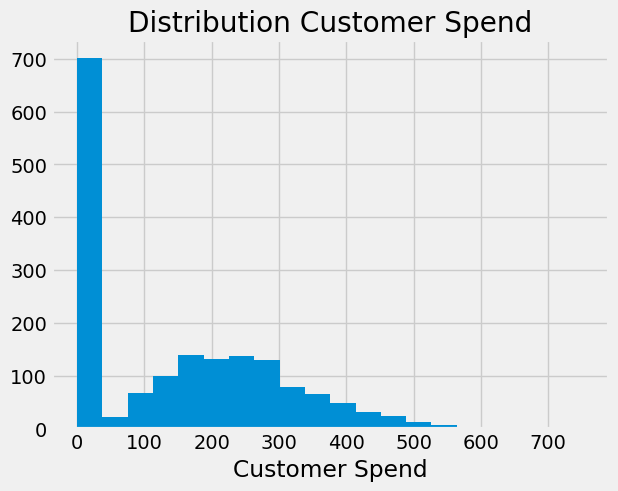

In [ ]:
#Bad COP

plt.hist(np.concatenate([np.random.gamma(5,50,1000), np.zeros(700)]), bins = 20)
plt.xlabel("Customer Spend")
plt.title("Distribution Customer Spend");





In [ ]:
#Chapter 8

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
!pip install linearmodels
from linearmodels.iv import IV2SLS

%matplotlib inline

pd.set_option("display.max_columns", 5)
style.use("fivethirtyeight")

data = pd.read_csv("./drive/MyDrive/0Colab/ak91.csv")
data.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.4 MB/s eta 0:00:00


,log_wage,years_of_schooling,year_of_birth,quarter_of_birth,state_of_birth
0,5.790019,12.0,30.0,1.0,45.0
1,5.952494,11.0,30.0,1.0,45.0
2,5.315949,12.0,30.0,1.0,45.0
3,5.595926,12.0,30.0,1.0,45.0
4,6.068915,12.0,30.0,1.0,37.0


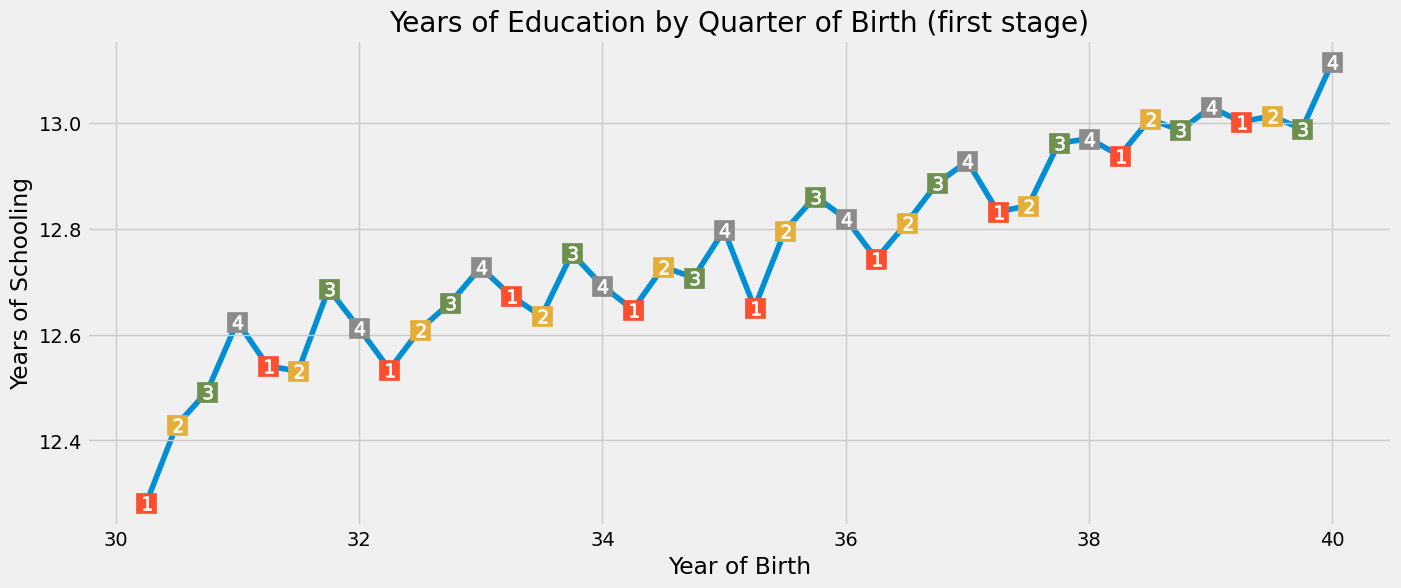

In [ ]:
group_data = (data
              .groupby(["year_of_birth", "quarter_of_birth"])
              [["log_wage", "years_of_schooling"]]
              .mean()
              .reset_index()
              .assign(time_of_birth = lambda d: d["year_of_birth"] + (d["quarter_of_birth"])/4))

#group_data = (data
#              .groupby(["year_of_birth", "quarter_of_birth"])
#              [["log_wage", "years_of_schooling"]]
#              .mean()
#              .reset_index()
#              .assign(time_of_birth = group_data["year_of_birth"] + (group_data["quarter_of_birth"])/4))

#group_data = (data
#              .groupby(["year_of_birth", "quarter_of_birth"])
#              [["log_wage", "years_of_schooling"]]
#              .mean()
#              .reset_index())
#group_data["time_of_birth"] = group_data["year_of_birth"] + (group_data["quarter_of_birth"])/4

plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["years_of_schooling"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["years_of_schooling"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Year of Birth")
plt.ylabel("Years of Schooling");

In [ ]:
#factor_data = pd.get_dummies(data, columns=['quarter_of_birth'], prefix='q')
factor_data = data.assign(**{f"q{int(q)}": (data["quarter_of_birth"] == q).astype(int)
                             for q in data["quarter_of_birth"].unique()})

factor_data.head()

first_stage = smf.ols("years_of_schooling ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", first_stage.params["q4"])
print("q4 p-value:, ", first_stage.pvalues["q4"])

reduced_form = smf.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", reduced_form.params["q4"])
print("q4 p-value:, ", reduced_form.pvalues["q4"])

q4 parameter estimate:,  0.10085809272787055
q4 p-value:,  5.464829416599837e-15
q4 parameter estimate:,  0.008603484260141542
q4 p-value:,  0.001494912718363033


In [ ]:
print(reduced_form.params["q4"] / first_stage.params["q4"])

#2SLS -->

iv_by_hand = smf.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + years_of_schooling_fitted",
                     data=factor_data.assign(years_of_schooling_fitted=first_stage.fittedvalues)).fit()

print(iv_by_hand.params["years_of_schooling_fitted"])

0.08530286492086424
0.0853028649208978


In [ ]:
def parse(model, exog):
  param = model.params[exog]
  se = model.std_errors[exog]
  p_val = model.pvalues[exog]
  print(f"Parameter: {param}")
  print(f"SE: {se}")
  print(f"95 CI: {(-1.96*se,1.96*se) + param}")
  print(f"P-value: {p_val}")


formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q4]'
iv2sls = IV2SLS.from_formula(formula, factor_data).fit()

parse(iv2sls, "years_of_schooling")

formula_2 = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q1 + q2 + q3]'
iv_many_zs = IV2SLS.from_formula(formula_2, factor_data).fit()

parse(iv_many_zs, "years_of_schooling")

Parameter: 0.08530286491936041
SE: 0.02554081281155219
95 CI: [0.03524287 0.13536286]
P-value: 0.0008381914653607936
Parameter: 0.10769370489195511
SE: 0.01955714901026733
95 CI: [0.06936169 0.14602572]
P-value: 3.657974678716869e-08


In [ ]:
formula = "log_wage ~ years_of_schooling + C(state_of_birth) + C(year_of_birth) + C(quarter_of_birth)"
ols = IV2SLS.from_formula(formula, data=data).fit()
parse(ols, "years_of_schooling")

Parameter: 0.06732572817658244
SE: 0.0003883998439048624
95 CI: [0.06656446 0.06808699]
P-value: 0.0
